### Customer data from SQL query "customer_data.sql" 

This is to analyze data output from DVD rental database - Customer view
Data extracted from PostgreSQL query was saved as excel file and imported as per below.

!!! All data comes from made-up database. Data set does not include real values. 

In [5]:
import pandas as pd
import numpy as np
#Visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
customer = pd.read_excel('customer_data_from_sql.xlsx')
customer.head(3)

,customer_id,customer_spent,first_name,last_name,full_name,address_id,district,city_id,city
0,148,211.55,Eleanor,Hunt,Eleanor Hunt,152,Saint-Denis,442,Saint-Denis
1,526,208.58,Karl,Seal,Karl Seal,532,Florida,101,Cape Coral
2,178,194.61,Marion,Snyder,Marion Snyder,182,So Paulo,456,Santa Brbara dOeste


In [12]:
#total amount expendiure from all customers in $ currency.
total_amount_spent = customer["customer_spent"].sum()
customer["customer_spent"].sum()

61312.04

In [13]:
#Average customer spent on DVD rentals
customer["customer_spent"].mean()

102.35732888146897

In [15]:
#Adding '% of total amount spend' column to see how much in %, single customer paid as compared to all expenditures on dvds.
customer["% of total amount spend"] = customer["customer_spent"] / total_amount_spent *100

In [16]:
customer.head(5)

,customer_id,customer_spent,first_name,last_name,full_name,address_id,district,city_id,city,% of total amount spend
0,148,211.55,Eleanor,Hunt,Eleanor Hunt,152,Saint-Denis,442,Saint-Denis,0.345038
1,526,208.58,Karl,Seal,Karl Seal,532,Florida,101,Cape Coral,0.340194
2,178,194.61,Marion,Snyder,Marion Snyder,182,So Paulo,456,Santa Brbara dOeste,0.317409
3,137,191.62,Rhonda,Kennedy,Rhonda Kennedy,141,Gelderland,29,Apeldoorn,0.312532
4,144,189.60,Clara,Shaw,Clara Shaw,148,Minsk,340,Molodetno,0.309238


In [82]:
#Number of unique customers per district
customer['district'].value_counts().head(3)

Buenos Aires    10
West Bengali     9
California       9
Name: district, dtype: int64

In [41]:
#GROUPING by district
area = customer.groupby("district")

In [55]:
#SUM of dollar amount spent per district. Top 5
area['customer_spent'].sum().sort_values(ascending = False).head(5)

district
Buenos Aires    1029.48
California       943.78
So Paulo         919.82
West Bengali     915.75
Shandong         858.85
Name: customer_spent, dtype: float64

In [67]:
#assigning output to the new variable "area_plot"
area_plot = area['customer_spent'].sum().sort_values(ascending = False).head(5)

### Total dollar amount spent on DVDs per distict

<AxesSubplot:title={'center':'Total dollar amount spent on DVDs per "district"'}, xlabel='total $ amount expenditure on DVDs', ylabel='district'>

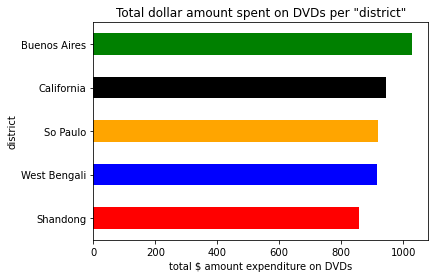

In [83]:
plt.title('Total dollar amount spent on DVDs per "district"')
plt.xlabel('total $ amount expenditure on DVDs')
area_plot.sort_values(ascending = True).plot(kind = 'barh', color = ['red', 'blue', 'orange', 'black', 'green'])